In [1]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Import reqiured librarys

In [2]:
trdata = ImageDataGenerator(validation_split=0.2)
traindata = trdata.flow_from_directory(directory=r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich\AI\cw\archive\PlantVillage",target_size=(224,224),subset="training")
testdata = trdata.flow_from_directory(directory=r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich\AI\cw\archive\PlantVillage", target_size=(224,224),subset = "validation")

Found 16515 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


Use the ImageDataGenerator to retrive and preprocess my data.
data will be fetched from file location and labels automatically applied. 
validation_split allows me to automatically split my data into a train and test sample.

In [3]:

traindata.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

Output labels of our data, 15 possible classes. 

In [3]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

Download the VGG architecture
set the VGG16 architecture weights to be that of the VGG16 architecture trained More than 14 million images, 
so that we can use transfer learning and not have to directly train these layers

In [4]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Summary shows VGG16 convolutional nural network layout.
currently has 1000 possible ouputs as specified by the image net dataset. 

In [5]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

Make the first 19 layers un-trainable, so that the weights of hese layers do not change during training

In [6]:
X= vggmodel.layers[-2].output
predictions = Dense(15, activation="softmax")(X)
model_final = Model(vggmodel.input,predictions)

Create the dense layer with 15 outputs, to repreasen our 15 classes of healhy/diseseased plants

In [7]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

compile our model with a learning rate of 0.0001.
use momentum to "momentum is known to speed up learning and to help not getting stuck in local minima." -https://datascience.stackexchange.com/questions/84167/what-is-momentum-in-neural-network

In [8]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
batchSize=32
steps = int(16515/batchSize)
print(steps)

516


In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/my_model_usingsave.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=40, verbose=1, mode='auto')
history = model_final.fit(traindata, batch_size = batchSize,steps_per_epoch= steps, epochs= 50, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])
model_final.save_weights("vgg16_1.h5")

Epoch 1/50
516/516 [==============================] - 2232s 4s/step - loss: 0.0827 - accuracy: 0.9779 - val_loss: 0.2148 - val_accuracy: 0.9375
Epoch 2/50
516/516 [==============================] - 2225s 4s/step - loss: 0.0393 - accuracy: 0.9948 - val_loss: 0.2800 - val_accuracy: 0.8750
Epoch 3/50
516/516 [==============================] - 2282s 4s/step - loss: 0.0224 - accuracy: 0.9986 - val_loss: 0.0946 - val_accuracy: 0.9688
Epoch 4/50
516/516 [==============================] - 2249s 4s/step - loss: 0.0154 - accuracy: 0.9996 - val_loss: 0.1290 - val_accuracy: 0.9375
Epoch 5/50
516/516 [==============================] - 2251s 4s/step - loss: 0.0110 - accuracy: 0.9999 - val_loss: 0.3195 - val_accuracy: 0.9375
Epoch 6/50
516/516 [==============================] - 2468s 5s/step - loss: 0.0088 - accuracy: 0.9999 - val_loss: 0.4399 - val_accuracy: 0.9375
Epoch 7/50
516/516 [==============================] - 2454s 5s/step - loss: 0.0072 - accuracy: 0.9999 - val_loss: 0.0989 - val_accuracy:

In [20]:
model_final.save("final.128.h5")

In [21]:
print(history)
np.save('my_history.128.npy',history.history)

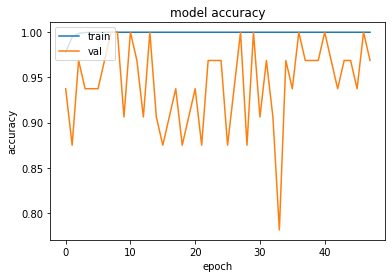

In [22]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 1s/step
[[1.00655176e-04 4.90058737e-04 2.18274043e-04 3.72114801e-03
  1.32400566e-03 1.37675237e-02 5.17022330e-03 2.10660929e-03
  3.37525494e-02 6.46121427e-02 1.76428407e-01 2.26755396e-01
  1.02686910e-02 4.42454129e-01 1.88301764e-02]]
label: {'Tomato__Tomato_mosaic_virus'}


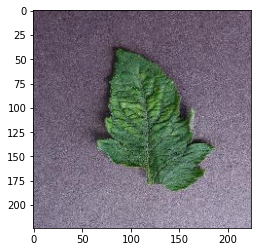

In [3]:
from keras.preprocessing import image
img = keras.utils.load_img(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich\AI\cw\just_peppers\predict\tom_mosaic.JPG",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/my_model_usingsave.h5")
output = saved_model.predict(img)
print(output)
result = np.where(output == np.amax(output))
# print('max probabilliy:', result[1])
# print('found at index :', result[0])
value = {i for i in traindata.class_indices if traindata.class_indices[i]==result[1]}
print("label:",value)

In [23]:
from keras.models import load_model
saved_model = load_model(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/final.128.h5")
test_score = saved_model.evaluate_generator(testdata, 2)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

C:\Users\Jordan Lankford\AppData\Local\Temp\ipykernel_22488\1204721946.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = saved_model.evaluate_generator(testdata, 2)


[INFO] accuracy: 98.44%
[INFO] Loss:  0.15916241705417633


Function to show label assigend to one given input. 

Predicions - CM

In [31]:
Y_pred = saved_model.predict(testdata)

129/129 [==============================] - 783s 6s/step


FINE TUNING  

In [14]:
from keras.models import load_model
saved_model = load_model(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/final.1.h5")

In [15]:
# Freeze four convolution blocks
for layer in saved_model.layers[15:]:
    layer.trainable = True

# Make sure you have frozen the correct layers
for i, layer in enumerate(saved_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 True
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten True
20 fc1 True
21 fc2 True
22 dense True


Make last CNN block trainable
aswell as my added top layers for transfer learning

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/my_model_usingsave.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
tuneHistory = saved_model.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 30, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])

C:\Users\Jordan Lankford\AppData\Local\Temp\ipykernel_19364\240515080.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  tuneHistory = saved_model.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 30, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])


Epoch 1/30
10/10 [==============================] - 46s 5s/step - loss: 0.0994 - accuracy: 0.9750 - val_loss: 0.4500 - val_accuracy: 0.8750
Epoch 2/30
10/10 [==============================] - 48s 5s/step - loss: 0.1009 - accuracy: 0.9781 - val_loss: 0.2633 - val_accuracy: 0.9062
Epoch 3/30
10/10 [==============================] - 50s 5s/step - loss: 0.0871 - accuracy: 0.9781 - val_loss: 0.3138 - val_accuracy: 0.9062
Epoch 4/30
10/10 [==============================] - 50s 5s/step - loss: 0.1363 - accuracy: 0.9625 - val_loss: 0.1828 - val_accuracy: 0.9375
Epoch 5/30
10/10 [==============================] - 49s 5s/step - loss: 0.1075 - accuracy: 0.9594 - val_loss: 0.2665 - val_accuracy: 0.8438
Epoch 6/30
10/10 [==============================] - 51s 5s/step - loss: 0.1176 - accuracy: 0.9750 - val_loss: 0.1371 - val_accuracy: 0.9375
Epoch 7/30
10/10 [==============================] - 48s 5s/step - loss: 0.1006 - accuracy: 0.9750 - val_loss: 0.1514 - val_accuracy: 0.9375
Epoch 8/30
10/10 [==

In [18]:
saved_model.save("final.2.h5")

In [19]:
saved_model = load_model(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/my_model_usingsave_final_finetuned.h5")
test_score = saved_model.evaluate_generator(testdata, 2)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

C:\Users\Jordan Lankford\AppData\Local\Temp\ipykernel_19364\4174750506.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = saved_model.evaluate_generator(testdata, 2)


[INFO] accuracy: 93.75%
[INFO] Loss:  0.189716175198555


1/1 [==============================] - 0s 362ms/step
[[5.1337160e-05 4.6513890e-04 8.0156809e-05 9.5455151e-04 9.9828714e-01
  4.0266932e-06 3.4323810e-05 3.1445165e-07 5.2791252e-06 1.2413070e-06
  7.0025846e-05 3.1691430e-05 3.3347330e-06 3.4484660e-06 8.0462887e-06]]
label: {'Potato___healthy'}


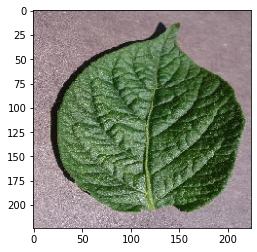

In [11]:
from keras.preprocessing import image
img = keras.utils.load_img(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich\AI\cw\just_peppers\predict\potato.JPG",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/my_model_usingsave_final_finetuned.h5")
output = saved_model.predict(img)
print(output)
result = np.where(output == np.amax(output))
# print('max probabilliy:', result[1])
# print('found at index :', result[0])
value = {i for i in traindata.class_indices if traindata.class_indices[i]==result[1]}
print("label:",value)

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [24]:
saved_model = load_model(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/final.128.h5")
all_y_pred = []
all_y_true = []

for i in range(len(testdata)):
    x, y = testdata[i]
    y_pred = saved_model.predict(x)
    
    all_y_pred.append(y_pred)
    all_y_true.append(y)

all_y_pred = np.concatenate(all_y_pred, axis=0)
all_y_true = np.concatenate(all_y_true, axis=0)

1/1 [==============================] - 4s 4s/step


In [26]:
y_true=np.argmax(all_y_true, axis=1)
y_pred = np.argmax(all_y_pred, axis=1)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_true, y_pred)

In [29]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

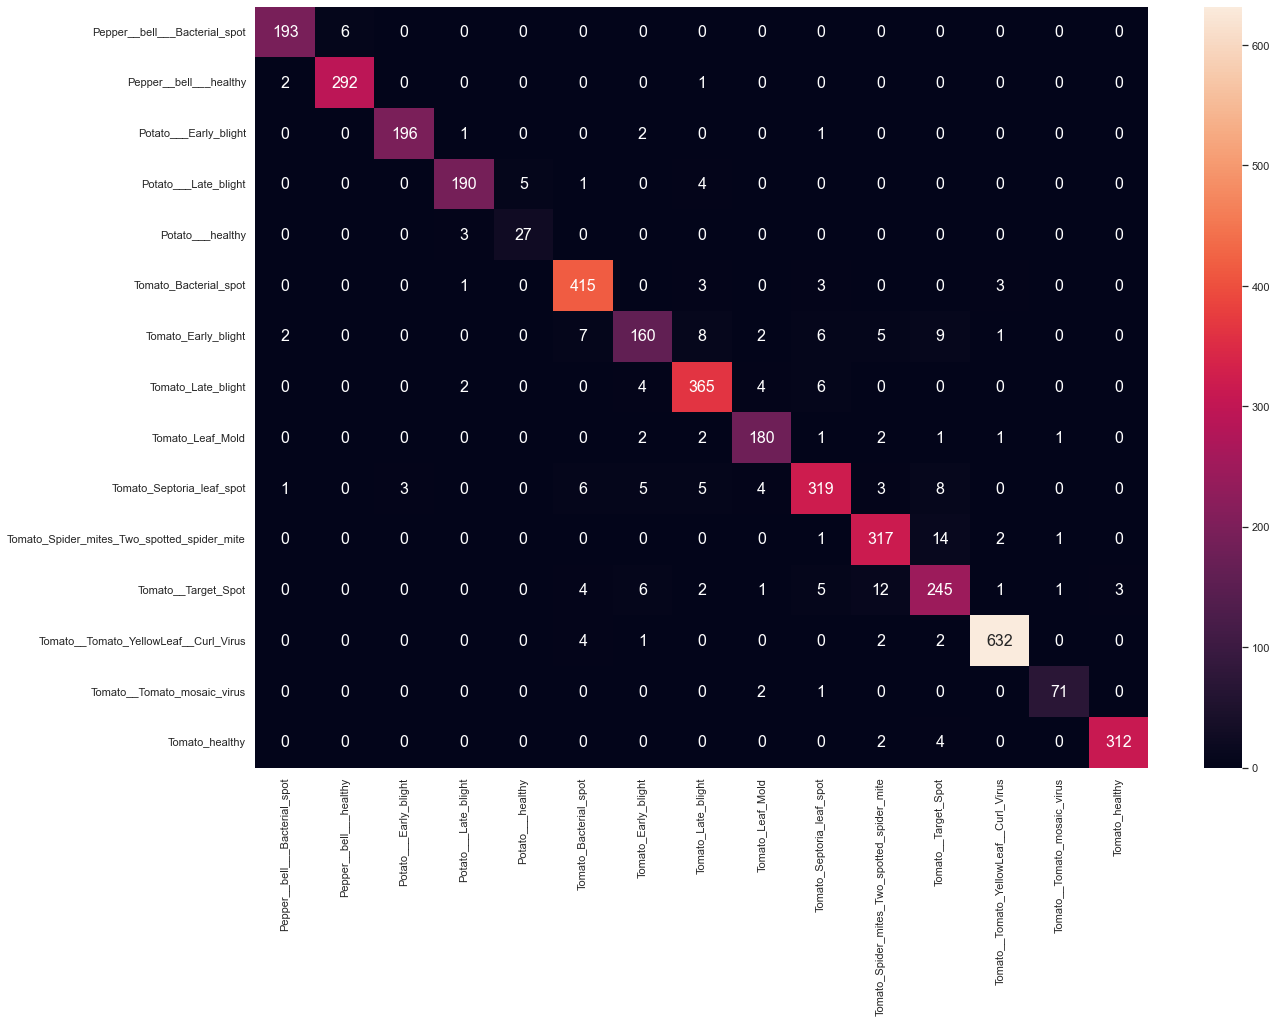

In [30]:
df_cm = pd.DataFrame(cm, traindata.class_indices.keys(), traindata.class_indices.keys())
plt.figure(figsize=(20,14))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()